# Bimodularity Directedness Benchmarking Analysis

This notebook provides a benchmarking analysis of bimodularity through directedness strength variation upon different datasets and parameter ranges.

## Overview
- **Toy Example**: Synthetic data analysis with parameter optimization.
- **C. Elegans**: Analysis of neural connectivity data (chemical and electrical gap junctions)
- **Brain**: Brain network analysis (TBD)

## Goals
1. Evaluate directedness influence on bicommunities 
2. Determine critical values for the directedness emphasis parameter where bicommunity reciprocity changes significatively
3. Dectect potential optimization for N, K through bicommunity reciprocity analysis

## 1. Imports and Config

Import all necessary libraries for bimodularity analysis, data manipulation, and visualization.

In [24]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bimodularity specific imports
import Bimodularity_Directedness_Benchmark as bimod_bench
import bimod_plots
import dgsp
import graph_examples as dgsp_graphs
# Additional utilities

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)


print("All libraries imported successfully!")

All libraries imported successfully!


In [25]:
#TODO: Configure plotting

## 2. Toy Example Analysis

Synthetic data analysis to validate benchmarking algorithms and parameter optimization strategies.

### 2.1 Loading of Data and Setting Parameters

Generate synthetic network data and set initial parameters for analysis.

Model :  $(1 + \alpha)A + A^\top$, where $\alpha A = \frac{A^{\gamma}}{A^{\gamma} + \left(A^\top\right)^{\gamma}} $

In [26]:
#TODO: Generate directed graph 
n_per_com = 40
density_value = .4
eig_id = 0

write_s = False
for_overleaf = True

A = dgsp_graphs.toy_n_communities(n_per_com, 4, com_density=density_value,
                                      connect_density=[density_value, density_value, 0, 
                                                       0, density_value, density_value],
                                      #connect_density=[1, 1, 0, 1, 1, 1],
                                      connect_out_prob=[1, 0, 0.5, 0.5, 1, 0],
                                      seed=28)


### 2.2 Asymmetry Variation and Relative Community Prediction

Analyze how asymmetry in the synthetic network affects bicommunity reciprocity

In [27]:
#TODO: generate directed graphs with different degree of directedness emphasis
gammas =  np.linspace(0, 5, 10)
alphas =  np.linspace(0, 10, 10)

communities = []
for gamma in gammas:
    g_com = []
    for alpha in alphas:
        model =  bimod_bench.adjacency_matrix_directedness_transform(A + A.T + alpha*A, gamma = gamma)

        # determine bicomunities 
        U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(model, null_model="outin"))
        V = Vh.T

        n_nodes = model.shape[0]

        vector_id_max = 2
        n_kmeans = 8

        edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(model, U, V, vector_id_max, method="kmeans",
                                                                n_kmeans=n_kmeans, scale_S= S[:vector_id_max], verbose=False)
        n_clusters = np.max(edge_clusters)

        sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")  
        g_com.append((sending_communities, receiving_communities))
    communities.append(g_com)



c:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\chris\anaconda3\Lib\site-packages\s

Using 10 pre-computed gamma values
Using 10 pre-computed alpha values
Testing 10 tolerance values
Computing tolerance variations for each gamma-alpha combination...
Processing tolerance 1/10: 0.000
Processing tolerance 2/10: 0.056
Processing tolerance 3/10: 0.111
Processing tolerance 4/10: 0.167
Processing tolerance 5/10: 0.222
Processing tolerance 6/10: 0.278
Processing tolerance 7/10: 0.333
Processing tolerance 8/10: 0.389
Processing tolerance 9/10: 0.444
Processing tolerance 10/10: 0.500
3D heatmap computation complete!
Processing tolerance 10/10: 0.500
3D heatmap computation complete!


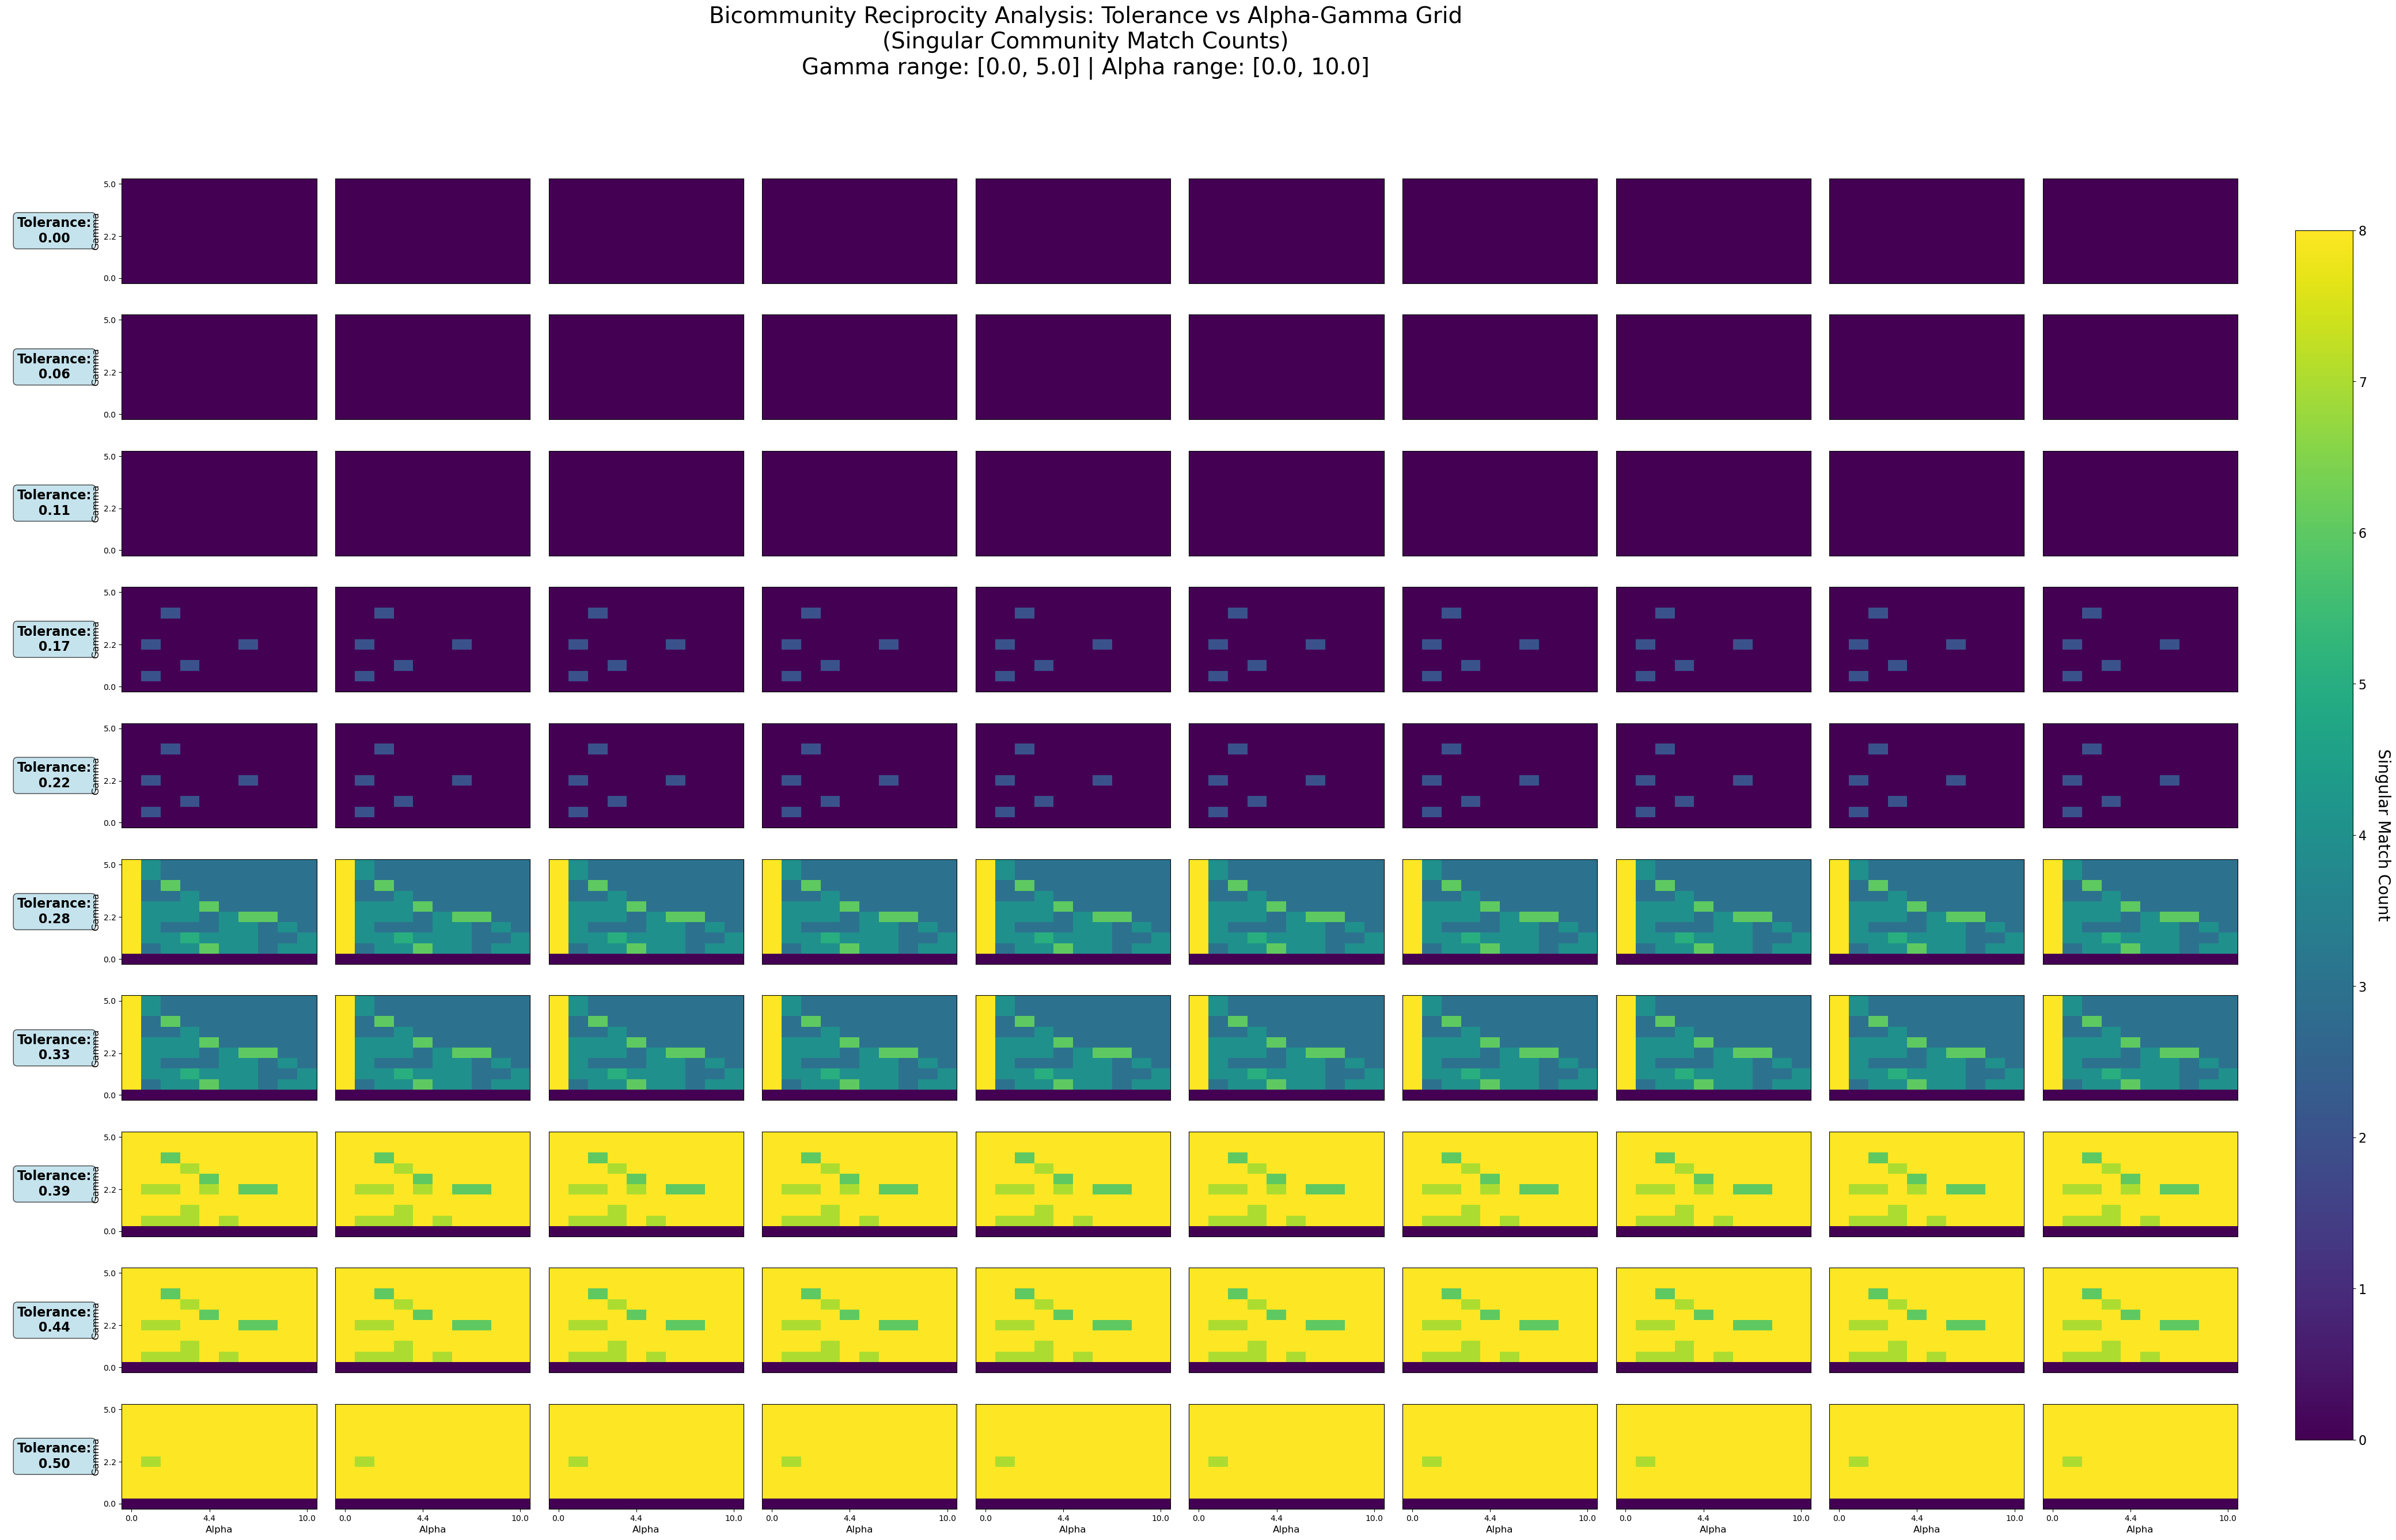

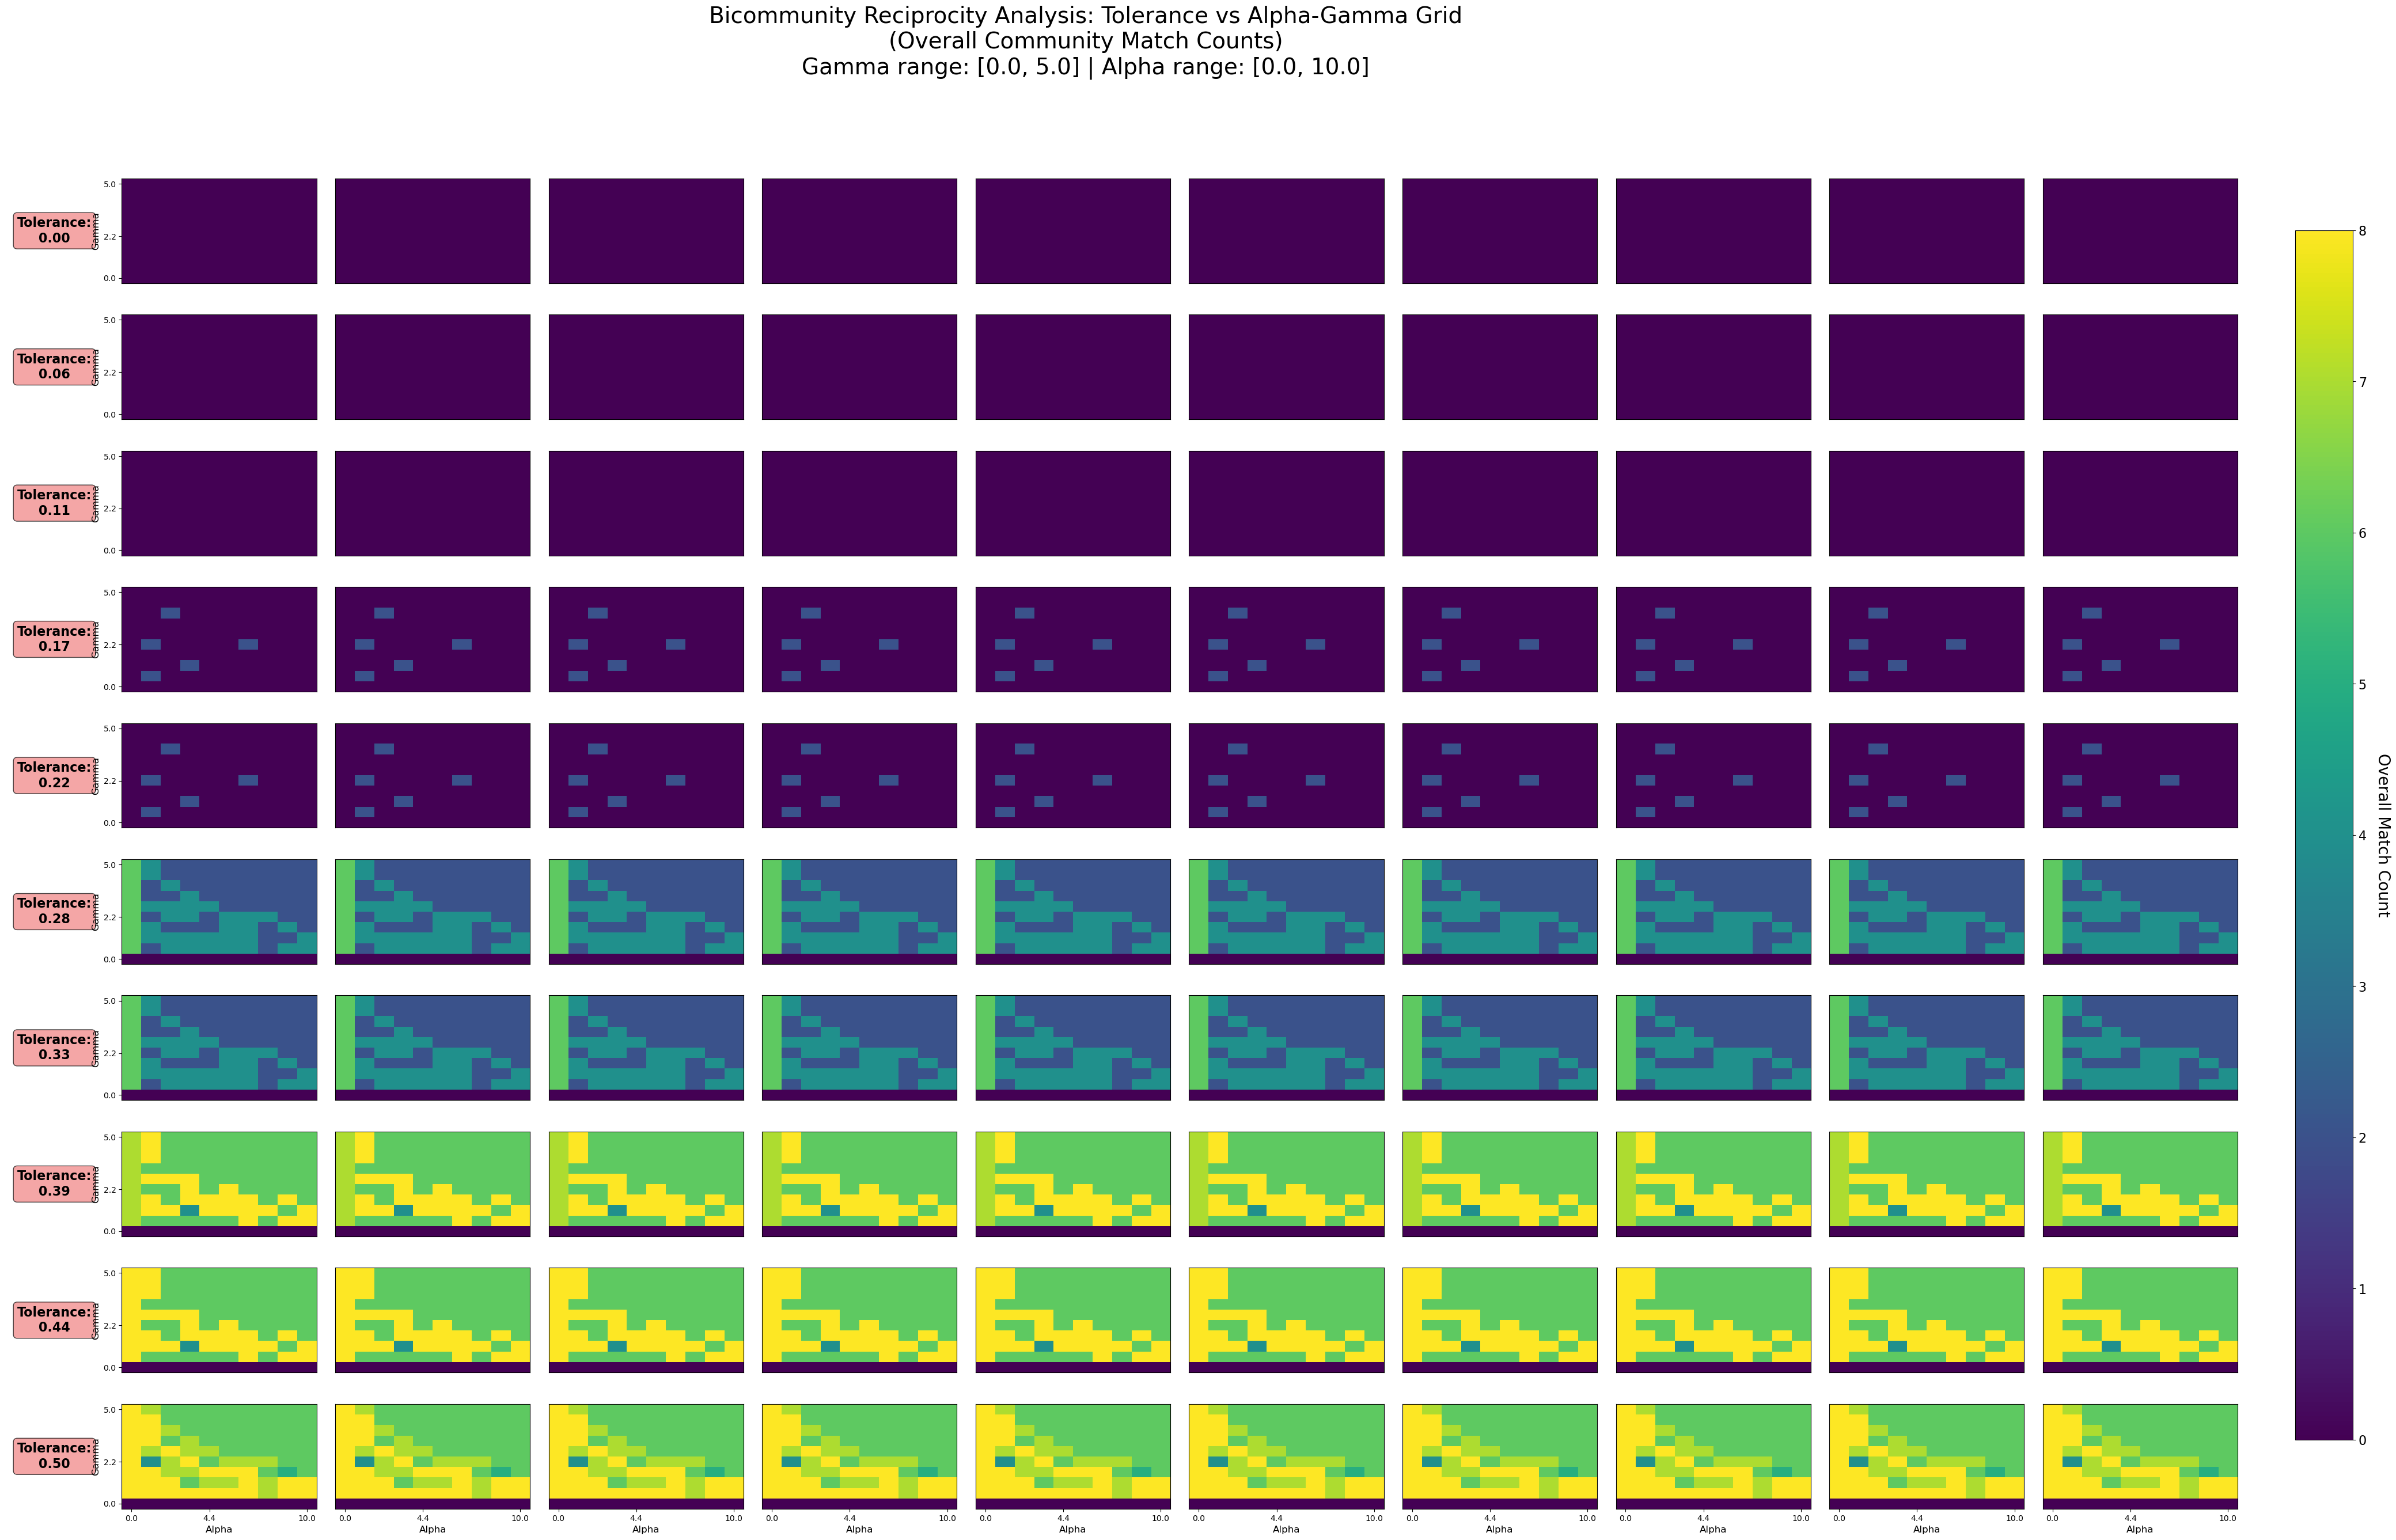

C:\Users\chris\AppData\Local\Temp\ipykernel_32388\1804645075.py:195: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


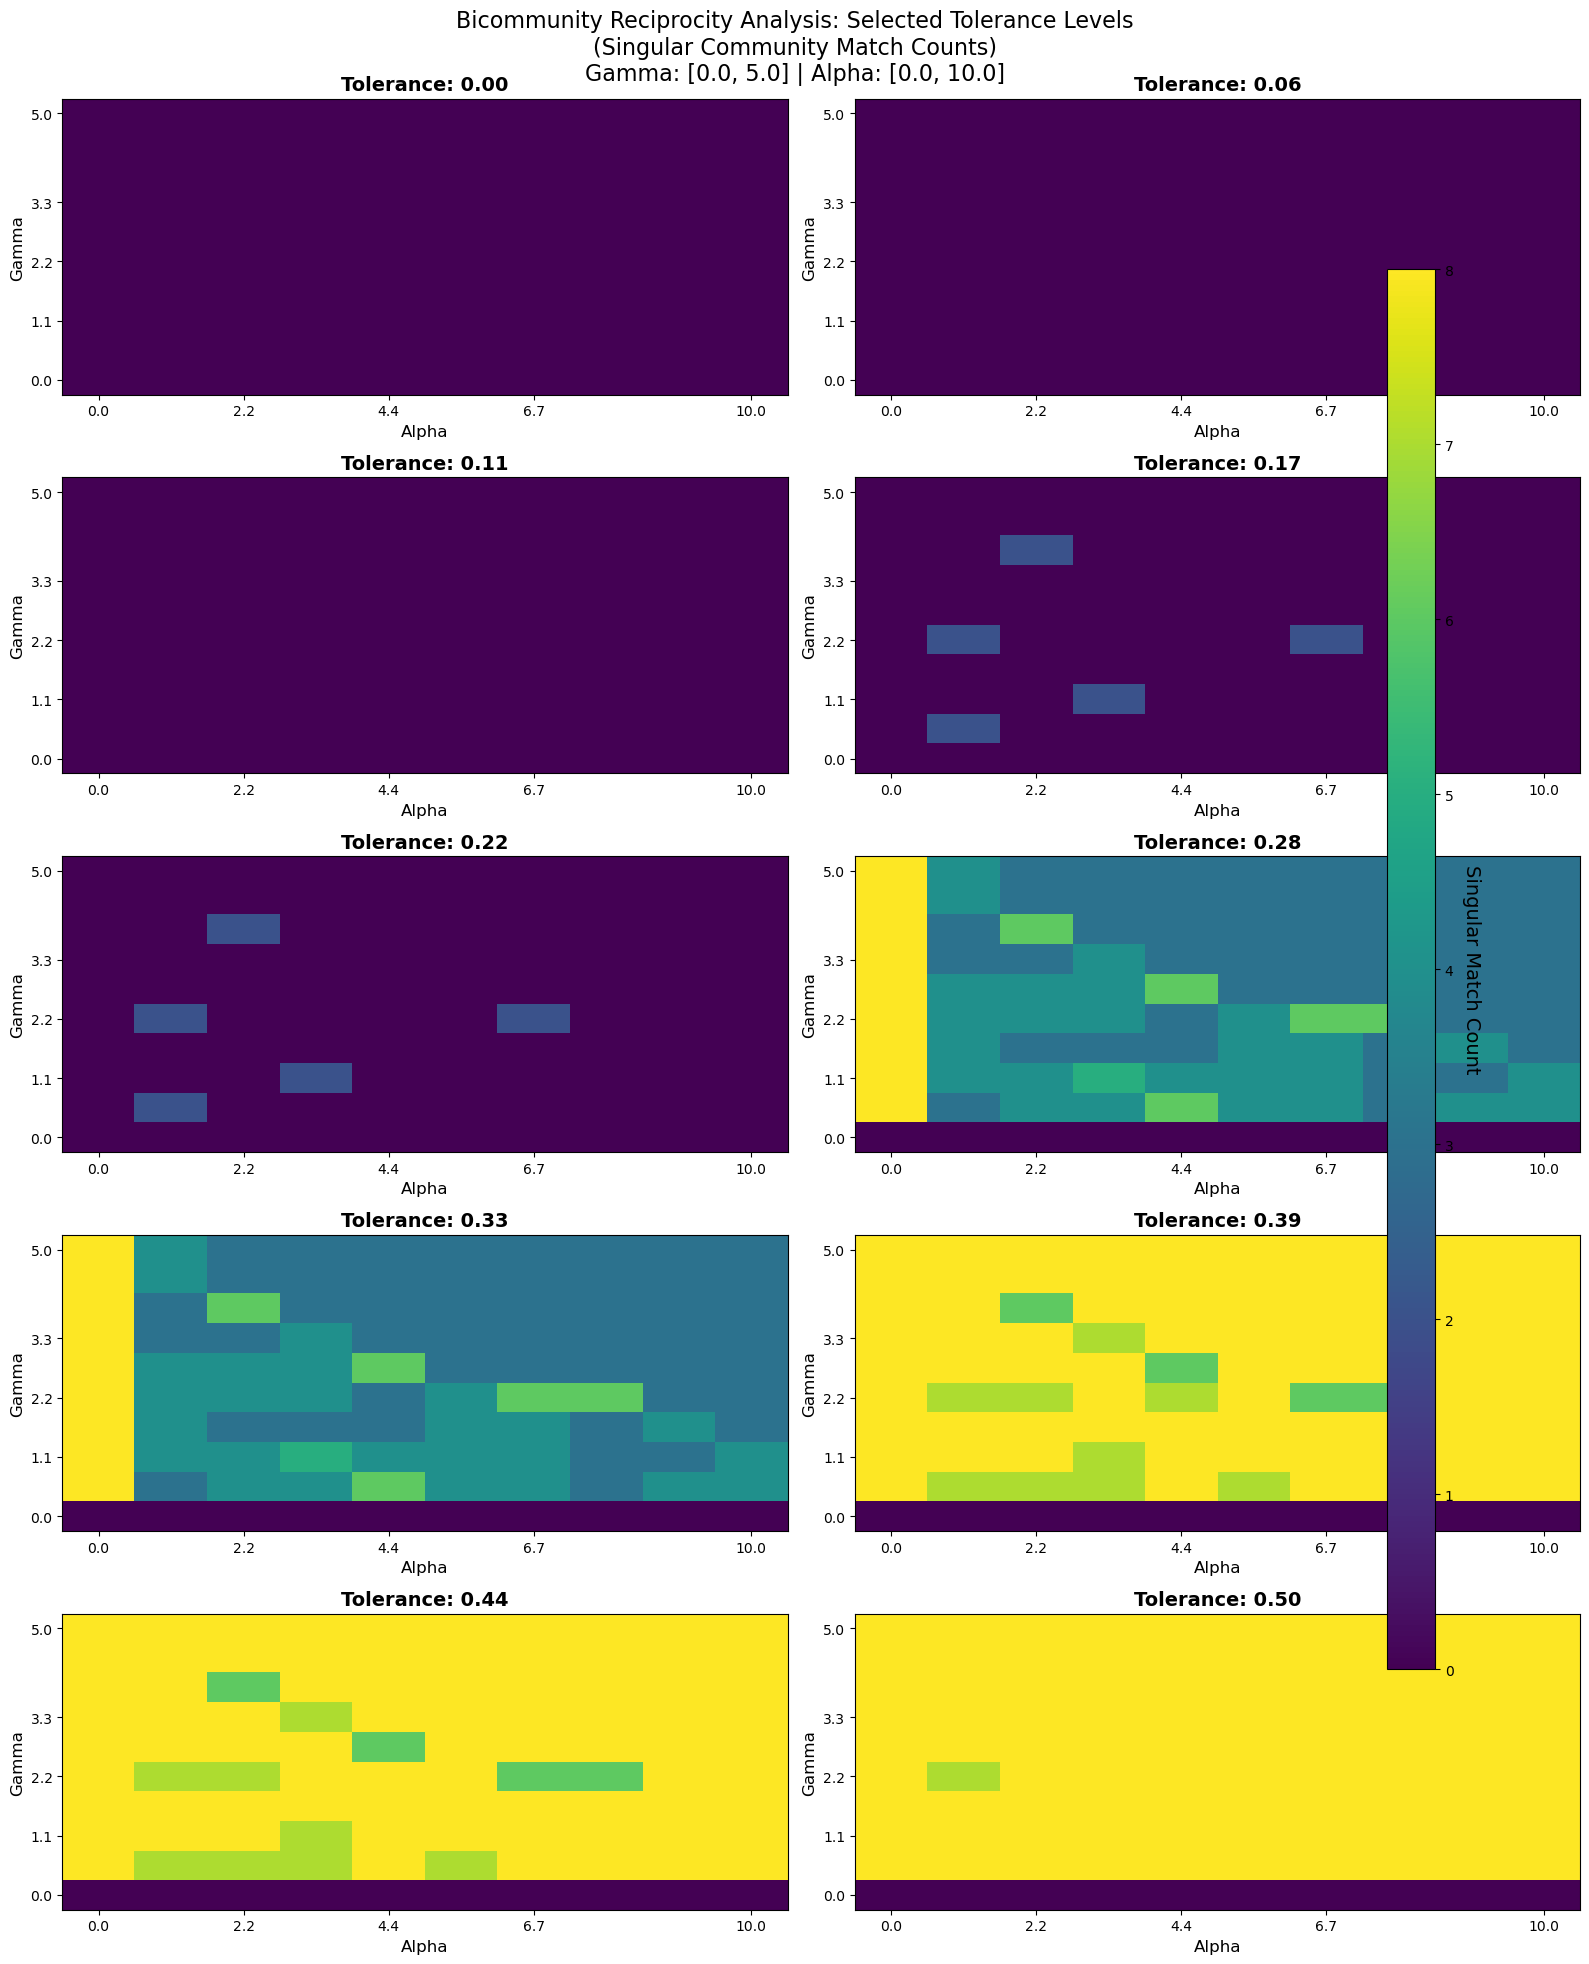


Comprehensive Heatmap Statistics:
Tolerance range: 0.000 to 0.500
Gamma range: 0.000 to 5.000
Alpha range: 0.000 to 10.000
Singular match count range: 0 to 8
Overall match count range: 0 to 8

Saving computed 3D arrays...
Arrays saved successfully!


In [28]:
#TODO: plot comprehensive heatmap grid of bicommunity reciprocity
# Create a comprehensive visualization: 10 tolerance levels x 10 heatmaps per row
# Each heatmap shows alpha vs gamma relationship for a specific tolerance

# Extract gamma and alpha values from the pre-computed results
gamma_values = gammas
alpha_values = alphas
tolerance_range = np.linspace(0, 0.5, 10)  # 10 tolerance levels

print(f"Using {len(communities)} pre-computed gamma values")
print(f"Using {len(communities[0])} pre-computed alpha values")
print(f"Testing {len(tolerance_range)} tolerance values")

# Initialize 3D array to store results: [tolerance, gamma, alpha]
singular_match_counts_3d = np.zeros((len(tolerance_range), len(gamma_values), len(alpha_values)))
overall_match_counts_3d = np.zeros((len(tolerance_range), len(gamma_values), len(alpha_values)))

print("Computing tolerance variations for each gamma-alpha combination...")

# Iterate through all tolerance values
for t_idx, tolerance in enumerate(tolerance_range):
    print(f"Processing tolerance {t_idx+1}/{len(tolerance_range)}: {tolerance:.3f}")
    
    # Iterate through gamma values (rows in communities)
    for g_idx, g_communities in enumerate(communities):
        # Iterate through alpha values (columns in communities)
        for a_idx, (sending_communities, receiving_communities) in enumerate(g_communities):
            fit_result = bimod_bench.community_fit_w_tolerance(sending_communities, receiving_communities, tolerance)
            singular_match_counts_3d[t_idx, g_idx, a_idx] = len(fit_result[0][0])  # singular community match count
            overall_match_counts_3d[t_idx, g_idx, a_idx] = len(fit_result[2][0])   # overall community match count

print("3D heatmap computation complete!")

# Calculate global min/max for consistent color scaling
singular_vmin, singular_vmax = singular_match_counts_3d.min(), singular_match_counts_3d.max()
overall_vmin, overall_vmax = overall_match_counts_3d.min(), overall_match_counts_3d.max()

# Create the comprehensive visualization with improved layout
fig = plt.figure(figsize=(50, 30))
fig.suptitle(f'Bicommunity Reciprocity Analysis: Tolerance vs Alpha-Gamma Grid\n(Singular Community Match Counts)\nGamma range: [{gamma_values.min():.1f}, {gamma_values.max():.1f}] | Alpha range: [{alpha_values.min():.1f}, {alpha_values.max():.1f}]', 
             fontsize=28, y=0.98)

# Create a grid layout: 10 rows x 11 columns (10 heatmaps + 1 for labels)
gs = fig.add_gridspec(10, 11, width_ratios=[0.5] + [1]*10, hspace=0.3, wspace=0.1)

# Create heatmaps for singular community match counts
for t_idx, tolerance in enumerate(tolerance_range):
    # Add tolerance label on the left
    ax_label = fig.add_subplot(gs[t_idx, 0])
    ax_label.text(0.5, 0.5, f'Tolerance:\n{tolerance:.2f}', 
                  ha='center', va='center', fontsize=16, fontweight='bold',
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    ax_label.set_xlim(0, 1)
    ax_label.set_ylim(0, 1)
    ax_label.axis('off')
    
    # Create 10 identical heatmaps for this tolerance level
    for plot_idx in range(10):
        ax = fig.add_subplot(gs[t_idx, plot_idx + 1])
        
        # Use the same data for all plots in a row (representing the same tolerance)
        data_to_plot = singular_match_counts_3d[t_idx, :, :]
        
        im = ax.imshow(data_to_plot, cmap='viridis', aspect='auto', origin='lower',
                      vmin=singular_vmin, vmax=singular_vmax)
        
        # Only show x-axis labels on bottom row
        if t_idx == len(tolerance_range) - 1:
            ax.set_xlabel('Alpha', fontsize=12)
            # Set tick labels
            n_ticks = 3
            alpha_tick_indices = np.linspace(0, len(alpha_values)-1, n_ticks, dtype=int)
            ax.set_xticks(alpha_tick_indices)
            ax.set_xticklabels([f'{alpha_values[i]:.1f}' for i in alpha_tick_indices], fontsize=10)
        else:
            ax.set_xticks([])
        
        # Only show y-axis labels on first heatmap of each row
        if plot_idx == 0:
            ax.set_ylabel('Gamma', fontsize=12)
            n_ticks = 3
            gamma_tick_indices = np.linspace(0, len(gamma_values)-1, n_ticks, dtype=int)
            ax.set_yticks(gamma_tick_indices)
            ax.set_yticklabels([f'{gamma_values[i]:.1f}' for i in gamma_tick_indices], fontsize=10)
        else:
            ax.set_yticks([])

# Add a single colorbar for the entire figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Singular Match Count', fontsize=20, rotation=270, labelpad=30)
cbar.ax.tick_params(labelsize=16)

plt.show()

# Create the same visualization for overall community match counts
fig2 = plt.figure(figsize=(50, 30))
fig2.suptitle(f'Bicommunity Reciprocity Analysis: Tolerance vs Alpha-Gamma Grid\n(Overall Community Match Counts)\nGamma range: [{gamma_values.min():.1f}, {gamma_values.max():.1f}] | Alpha range: [{alpha_values.min():.1f}, {alpha_values.max():.1f}]', 
              fontsize=28, y=0.98)

# Create a grid layout: 10 rows x 11 columns (10 heatmaps + 1 for labels)
gs2 = fig2.add_gridspec(10, 11, width_ratios=[0.5] + [1]*10, hspace=0.3, wspace=0.1)

# Create heatmaps for overall community match counts
for t_idx, tolerance in enumerate(tolerance_range):
    # Add tolerance label on the left
    ax_label = fig2.add_subplot(gs2[t_idx, 0])
    ax_label.text(0.5, 0.5, f'Tolerance:\n{tolerance:.2f}', 
                  ha='center', va='center', fontsize=16, fontweight='bold',
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
    ax_label.set_xlim(0, 1)
    ax_label.set_ylim(0, 1)
    ax_label.axis('off')
    
    # Create 10 identical heatmaps for this tolerance level
    for plot_idx in range(10):
        ax = fig2.add_subplot(gs2[t_idx, plot_idx + 1])
        
        # Use the same data for all plots in a row (representing the same tolerance)
        data_to_plot = overall_match_counts_3d[t_idx, :, :]
        
        im2 = ax.imshow(data_to_plot, cmap='viridis', aspect='auto', origin='lower',
                       vmin=overall_vmin, vmax=overall_vmax)
        
        # Only show x-axis labels on bottom row
        if t_idx == len(tolerance_range) - 1:
            ax.set_xlabel('Alpha', fontsize=12)
            # Set tick labels
            n_ticks = 3
            alpha_tick_indices = np.linspace(0, len(alpha_values)-1, n_ticks, dtype=int)
            ax.set_xticks(alpha_tick_indices)
            ax.set_xticklabels([f'{alpha_values[i]:.1f}' for i in alpha_tick_indices], fontsize=10)
        else:
            ax.set_xticks([])
        
        # Only show y-axis labels on first heatmap of each row
        if plot_idx == 0:
            ax.set_ylabel('Gamma', fontsize=12)
            n_ticks = 3
            gamma_tick_indices = np.linspace(0, len(gamma_values)-1, n_ticks, dtype=int)
            ax.set_yticks(gamma_tick_indices)
            ax.set_yticklabels([f'{gamma_values[i]:.1f}' for i in gamma_tick_indices], fontsize=10)
        else:
            ax.set_yticks([])

# Add a single colorbar for the entire figure
cbar_ax2 = fig2.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar2 = fig2.colorbar(im2, cax=cbar_ax2)
cbar2.set_label('Overall Match Count', fontsize=20, rotation=270, labelpad=30)
cbar2.ax.tick_params(labelsize=16)

plt.show()

# Create a more compact and readable version
fig3, axes3 = plt.subplots(5, 2, figsize=(16, 20))
fig3.suptitle(f'Bicommunity Reciprocity Analysis: Selected Tolerance Levels\n(Singular Community Match Counts)\nGamma: [{gamma_values.min():.1f}, {gamma_values.max():.1f}] | Alpha: [{alpha_values.min():.1f}, {alpha_values.max():.1f}]', 
              fontsize=16)

# Select 10 tolerance values for this compact visualization
selected_tolerances = np.linspace(0, 0.5, 10)
ims = []

for i, tolerance in enumerate(selected_tolerances):
    row = i // 2
    col = i % 2
    
    # Find the closest tolerance index in our computed data
    t_idx = np.argmin(np.abs(tolerance_range - tolerance))
    data_to_plot = singular_match_counts_3d[t_idx, :, :]
    
    im = axes3[row, col].imshow(data_to_plot, cmap='viridis', aspect='auto', origin='lower',
                               vmin=singular_vmin, vmax=singular_vmax)
    ims.append(im)
    
    axes3[row, col].set_title(f'Tolerance: {tolerance:.2f}', fontsize=14, fontweight='bold')
    axes3[row, col].set_xlabel('Alpha', fontsize=12)
    axes3[row, col].set_ylabel('Gamma', fontsize=12)
    
    # Set tick labels
    n_ticks = 5
    gamma_tick_indices = np.linspace(0, len(gamma_values)-1, n_ticks, dtype=int)
    alpha_tick_indices = np.linspace(0, len(alpha_values)-1, n_ticks, dtype=int)
    
    axes3[row, col].set_xticks(alpha_tick_indices)
    axes3[row, col].set_xticklabels([f'{alpha_values[i]:.1f}' for i in alpha_tick_indices])
    axes3[row, col].set_yticks(gamma_tick_indices)
    axes3[row, col].set_yticklabels([f'{gamma_values[i]:.1f}' for i in gamma_tick_indices])

# Add a single colorbar for the compact visualization
fig3.subplots_adjust(right=0.85)
cbar_ax3 = fig3.add_axes([0.87, 0.15, 0.03, 0.7])
cbar3 = fig3.colorbar(ims[0], cax=cbar_ax3)
cbar3.set_label('Singular Match Count', fontsize=14, rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Print comprehensive statistics
print(f"\nComprehensive Heatmap Statistics:")
print(f"Tolerance range: {tolerance_range.min():.3f} to {tolerance_range.max():.3f}")
print(f"Gamma range: {min(gamma_values):.3f} to {max(gamma_values):.3f}")
print(f"Alpha range: {min(alpha_values):.3f} to {max(alpha_values):.3f}")
print(f"Singular match count range: {singular_match_counts_3d.min():.0f} to {singular_match_counts_3d.max():.0f}")
print(f"Overall match count range: {overall_match_counts_3d.min():.0f} to {overall_match_counts_3d.max():.0f}")

# Save the 3D arrays for further analysis
print("\nSaving computed 3D arrays...")
np.save('singular_match_counts_3d.npy', singular_match_counts_3d)
np.save('overall_match_counts_3d.npy', overall_match_counts_3d)
np.save('tolerance_range.npy', tolerance_range)
print("Arrays saved successfully!")

### 2.3 Tolerance Minimization and emphasis parameter Determination

Optimize tolerance and emphasis parameters for the toy example.

In [29]:
#TODO: Determine suitable values for directedness emphasis parameter and matching tolerance 

### 2.4 Selection of Range for N, K, gamma, epsilon through Uniqueness ( meaningless for toy example)

Optimize parameter selection based on uniqueness and stability criteria.

In [30]:
#TODO: reproduce analysis with various N and K 


In [31]:
#TODO: interpret results 

## 3. C. Elegans Neural Network Analysis

Analysis of C. Elegans neural connectivity data including both chemical synapses and electrical gap junctions.

Models :
1. $(1 + \alpha)A_{chem} + A_{chem}^\top$, where $\alpha A_{chem} = \frac{A_{chem}^{\gamma}}{A_{chem}^{\gamma} + \left(A_{chem}^\top\right)^{\gamma}} $
2. $(1 + \alpha)A_{chem} + A_{EGJ}$, where $\alpha A_{chem} = \frac{A_{chem}^{\gamma}}{A_{chem}^{\gamma} + \left(A_{chem}^\top\right)^{\gamma}} $

### 3.1 Loading of Data and Setting Parameters (Chemical and Electrical Gap Junctions)

Load and preprocess C. Elegans neural connectivity data for both chemical synapses and gap junctions.

In [32]:
#TODO:  

no_sex = False
gap_junc = False

wiring_sym = np.genfromtxt("./data/celegans_graph"+gap_junc*"_GAP"+".csv", delimiter=",")
neuron_df = pd.read_csv("./data/celegans_neurons.csv")

wiring_mod = dgsp.modularity_matrix(wiring_sym, null_model="outin")
print(f"Asymmetric wiring matrix has shape {wiring_sym.shape}")

nodes_labels = neuron_df.loc[:, "Neuron"]
nodes_posx = neuron_df.loc[:, "Position x"]
nodes_posy = neuron_df.loc[:, "Position y"]

d_mat = np.diag(wiring_sym.sum(axis=1))

U, S, Vh = dgsp.sorted_SVD(wiring_mod, fix_negative=False)
V = Vh.T

sort_idx = np.flip(np.argsort(S))
S = S[sort_idx]
U = U[:, sort_idx]
V = V[:, sort_idx]

neuron_df

A_chem = None
A_egj =  None

Asymmetric wiring matrix has shape (279, 279)


### 3.2 Asymmetry Variation and Relative Community Prediction

Analyze asymmetry effects in both chemical and gap junction networks.

In [33]:
#TODO: generate directed graphs with different degree of directedness emphasis
gammas = np.linspace(0, 10, 100)
communities_model1 = []
communities_model2 = []
for gamma  in gammas:
    model_1 =  A_chem + A_chem.T + bimod_bench.adjacency_matrix_directedness_transform(A_chem, gamma = gamma)
    model_2 =  A_chem + A_egj.T + bimod_bench.adjacency_matrix_directedness_transform(A_chem, gamma = gamma)

    # model_1
    U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(model_1, null_model="outin"))
    V = Vh.T

    n_nodes = model_1.shape[0]

    #vector_id_max = 4
    vector_id_max = 5
    n_kmeans = 12

    edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(model_1, U, V, vector_id_max, method="kmeans",
                                                            n_kmeans=n_kmeans, verbose=True, max_k=10)
    n_clusters = np.max(edge_clusters)

    sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")  
    communities_model1.append((gamma, sending_communities, receiving_communities))

    # moderl_2
    U, S, Vh = dgsp.sorted_SVD(dgsp.modularity_matrix(model_2, null_model="outin"))
    V = Vh.T

    n_nodes = model_1.shape[0]

    #vector_id_max = 4
    vector_id_max = 5
    n_kmeans = 12

    edge_clusters, edge_clusters_mat = dgsp.edge_bicommunities(model_2, U, V, vector_id_max, method="kmeans",
                                                            n_kmeans=n_kmeans, verbose=True, max_k=10)
    n_clusters = np.max(edge_clusters)

    sending_communities, receiving_communities = dgsp.get_node_clusters(edge_clusters, edge_clusters_mat, method="bimodularity")  
    communities_model2.append((gamma, sending_communities, receiving_communities))



AttributeError: 'NoneType' object has no attribute 'T'

In [ ]:
# MODEL 1
# Extract gamma values and communities from the pre-computed results
communities = communities_model1
gamma_values = gammas
tolerance_range = np.linspace(0, 0.5, 50)  # More tolerance points for smoother heatmap

print(f"Using {len(communities)} pre-computed gamma values")
print(f"Testing {len(tolerance_range)} tolerance values")

# Initialize arrays to store results
singular_match_counts = np.zeros((len(communities), len(tolerance_range)))
overall_match_counts = np.zeros((len(communities), len(tolerance_range)))

print("Computing tolerance variations for each gamma...")

for i, (gamma, sending_communities, receiving_communities) in enumerate(communities):
    if i % 10 == 0:  # Progress indicator
        print(f"Processing gamma {i+1}/{len(communities)}: {gamma:.3f}")
    
    # Calculate match counts for different tolerance values using pre-computed communities
    for j, tolerance in enumerate(tolerance_range):
        fit_result = bimod_bench.community_fit_w_tolerance(sending_communities, receiving_communities, tolerance)
        singular_match_counts[i, j] = len(fit_result[0][0])  # singular community match count
        overall_match_counts[i, j] = len(fit_result[2][0])   # overall community match count

print("Heatmap computation complete!")

# Create the heatmaps using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Singular community match count heatmap
im1 = axes[0].imshow(singular_match_counts, cmap='viridis', aspect='auto', origin='lower')
axes[0].set_title('Singular Community Match Count\n(Gamma vs Tolerance)')
axes[0].set_xlabel('Tolerance (epsilon)')
axes[0].set_ylabel('Gamma')

# Set tick labels for better readability
n_gamma_ticks = 10
n_tolerance_ticks = 10
gamma_tick_indices = np.linspace(0, len(gammas)-1, n_gamma_ticks, dtype=int)
tolerance_tick_indices = np.linspace(0, len(tolerance_range)-1, n_tolerance_ticks, dtype=int)

axes[0].set_xticks(tolerance_tick_indices)
axes[0].set_xticklabels([f'{tolerance_range[i]:.2f}' for i in tolerance_tick_indices])
axes[0].set_yticks(gamma_tick_indices)
axes[0].set_yticklabels([f'{gammas[i]:.2f}' for i in gamma_tick_indices])

plt.colorbar(im1, ax=axes[0], label='Match Count')

# Overall community match count heatmap
im2 = axes[1].imshow(overall_match_counts, cmap='viridis', aspect='auto', origin='lower')
axes[1].set_title('Overall Community Match Count\n(Gamma vs Tolerance)')
axes[1].set_xlabel('Tolerance (epsilon)')
axes[1].set_ylabel('Gamma')

axes[1].set_xticks(tolerance_tick_indices)
axes[1].set_xticklabels([f'{tolerance_range[i]:.2f}' for i in tolerance_tick_indices])
axes[1].set_yticks(gamma_tick_indices)
axes[1].set_yticklabels([f'{gammas[i]:.2f}' for i in gamma_tick_indices])

plt.colorbar(im2, ax=axes[1], label='Match Count')

plt.tight_layout()
plt.show()

# Create seaborn heatmaps for better aesthetics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create DataFrames for seaborn with proper indexing
singular_df = pd.DataFrame(singular_match_counts, 
                          index=[f'{g:.3f}' for g in gammas],
                          columns=[f'{t:.3f}' for t in tolerance_range])

overall_df = pd.DataFrame(overall_match_counts,
                         index=[f'{g:.3f}' for g in gammas], 
                         columns=[f'{t:.3f}' for t in tolerance_range])

# Seaborn heatmaps with better formatting
sns.heatmap(singular_df, ax=axes[0], cmap='viridis', cbar_kws={'label': 'Match Count'})
axes[0].set_title('Singular Community Match Count\n(Gamma vs Tolerance)')
axes[0].set_xlabel('Tolerance (epsilon)')
axes[0].set_ylabel('Gamma')

# Show only every nth tick for readability
n_display_ticks = 5
gamma_display_ticks = range(0, len(gammas), len(gammas)//n_display_ticks)
tolerance_display_ticks = range(0, len(tolerance_range), len(tolerance_range)//n_display_ticks)

axes[0].set_xticks(tolerance_display_ticks)
axes[0].set_xticklabels([f'{tolerance_range[i]:.2f}' for i in tolerance_display_ticks])
axes[0].set_yticks(gamma_display_ticks)
axes[0].set_yticklabels([f'{gammas[i]:.2f}' for i in gamma_display_ticks])

sns.heatmap(overall_df, ax=axes[1], cmap='viridis', cbar_kws={'label': 'Match Count'})
axes[1].set_title('Overall Community Match Count\n(Gamma vs Tolerance)')
axes[1].set_xlabel('Tolerance (epsilon)')
axes[1].set_ylabel('Gamma')

axes[1].set_xticks(tolerance_display_ticks)
axes[1].set_xticklabels([f'{tolerance_range[i]:.2f}' for i in tolerance_display_ticks])
axes[1].set_yticks(gamma_display_ticks)
axes[1].set_yticklabels([f'{gammas[i]:.2f}' for i in gamma_display_ticks])

plt.tight_layout()
plt.show()

# Print some statistics about the results
print(f"\nHeatmap Statistics:")
print(f"Gamma range: {min(gammas):.3f} to {max(gammas):.3f}")
print(f"Tolerance range: {min(tolerance_range):.3f} to {max(tolerance_range):.3f}")
print(f"Singular match count range: {singular_match_counts.min():.0f} to {singular_match_counts.max():.0f}")
print(f"Overall match count range: {overall_match_counts.min():.0f} to {overall_match_counts.max():.0f}")


In [ ]:
# MODEL 2
# Extract gamma values and communities from the pre-computed results
communities = communities_model2
gamma_values = gammas
tolerance_range = np.linspace(0, 0.5, 50)  # More tolerance points for smoother heatmap

print(f"Using {len(communities)} pre-computed gamma values")
print(f"Testing {len(tolerance_range)} tolerance values")

# Initialize arrays to store results
singular_match_counts = np.zeros((len(communities), len(tolerance_range)))
overall_match_counts = np.zeros((len(communities), len(tolerance_range)))

print("Computing tolerance variations for each gamma...")

for i, (gamma, sending_communities, receiving_communities) in enumerate(communities):
    if i % 10 == 0:  # Progress indicator
        print(f"Processing gamma {i+1}/{len(communities)}: {gamma:.3f}")
    
    # Calculate match counts for different tolerance values using pre-computed communities
    for j, tolerance in enumerate(tolerance_range):
        fit_result = bimod_bench.community_fit_w_tolerance(sending_communities, receiving_communities, tolerance)
        singular_match_counts[i, j] = len(fit_result[0][0])  # singular community match count
        overall_match_counts[i, j] = len(fit_result[2][0])   # overall community match count

print("Heatmap computation complete!")

# Create the heatmaps using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Singular community match count heatmap
im1 = axes[0].imshow(singular_match_counts, cmap='viridis', aspect='auto', origin='lower')
axes[0].set_title('Singular Community Match Count\n(Gamma vs Tolerance)')
axes[0].set_xlabel('Tolerance (epsilon)')
axes[0].set_ylabel('Gamma')

# Set tick labels for better readability
n_gamma_ticks = 10
n_tolerance_ticks = 10
gamma_tick_indices = np.linspace(0, len(gammas)-1, n_gamma_ticks, dtype=int)
tolerance_tick_indices = np.linspace(0, len(tolerance_range)-1, n_tolerance_ticks, dtype=int)

axes[0].set_xticks(tolerance_tick_indices)
axes[0].set_xticklabels([f'{tolerance_range[i]:.2f}' for i in tolerance_tick_indices])
axes[0].set_yticks(gamma_tick_indices)
axes[0].set_yticklabels([f'{gammas[i]:.2f}' for i in gamma_tick_indices])

plt.colorbar(im1, ax=axes[0], label='Match Count')

# Overall community match count heatmap
im2 = axes[1].imshow(overall_match_counts, cmap='viridis', aspect='auto', origin='lower')
axes[1].set_title('Overall Community Match Count\n(Gamma vs Tolerance)')
axes[1].set_xlabel('Tolerance (epsilon)')
axes[1].set_ylabel('Gamma')

axes[1].set_xticks(tolerance_tick_indices)
axes[1].set_xticklabels([f'{tolerance_range[i]:.2f}' for i in tolerance_tick_indices])
axes[1].set_yticks(gamma_tick_indices)
axes[1].set_yticklabels([f'{gammas[i]:.2f}' for i in gamma_tick_indices])

plt.colorbar(im2, ax=axes[1], label='Match Count')

plt.tight_layout()
plt.show()

# Create seaborn heatmaps for better aesthetics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create DataFrames for seaborn with proper indexing
singular_df = pd.DataFrame(singular_match_counts, 
                          index=[f'{g:.3f}' for g in gammas],
                          columns=[f'{t:.3f}' for t in tolerance_range])

overall_df = pd.DataFrame(overall_match_counts,
                         index=[f'{g:.3f}' for g in gammas], 
                         columns=[f'{t:.3f}' for t in tolerance_range])

# Seaborn heatmaps with better formatting
sns.heatmap(singular_df, ax=axes[0], cmap='viridis', cbar_kws={'label': 'Match Count'})
axes[0].set_title('Singular Community Match Count\n(Gamma vs Tolerance)')
axes[0].set_xlabel('Tolerance (epsilon)')
axes[0].set_ylabel('Gamma')

# Show only every nth tick for readability
n_display_ticks = 5
gamma_display_ticks = range(0, len(gammas), len(gammas)//n_display_ticks)
tolerance_display_ticks = range(0, len(tolerance_range), len(tolerance_range)//n_display_ticks)

axes[0].set_xticks(tolerance_display_ticks)
axes[0].set_xticklabels([f'{tolerance_range[i]:.2f}' for i in tolerance_display_ticks])
axes[0].set_yticks(gamma_display_ticks)
axes[0].set_yticklabels([f'{gammas[i]:.2f}' for i in gamma_display_ticks])

sns.heatmap(overall_df, ax=axes[1], cmap='viridis', cbar_kws={'label': 'Match Count'})
axes[1].set_title('Overall Community Match Count\n(Gamma vs Tolerance)')
axes[1].set_xlabel('Tolerance (epsilon)')
axes[1].set_ylabel('Gamma')

axes[1].set_xticks(tolerance_display_ticks)
axes[1].set_xticklabels([f'{tolerance_range[i]:.2f}' for i in tolerance_display_ticks])
axes[1].set_yticks(gamma_display_ticks)
axes[1].set_yticklabels([f'{gammas[i]:.2f}' for i in gamma_display_ticks])

plt.tight_layout()
plt.show()

# Print some statistics about the results
print(f"\nHeatmap Statistics:")
print(f"Gamma range: {min(gammas):.3f} to {max(gammas):.3f}")
print(f"Tolerance range: {min(tolerance_range):.3f} to {max(tolerance_range):.3f}")
print(f"Singular match count range: {singular_match_counts.min():.0f} to {singular_match_counts.max():.0f}")
print(f"Overall match count range: {overall_match_counts.min():.0f} to {overall_match_counts.max():.0f}")


### 3.3 Tolerance Minimization and Uniqueness Determination

Optimize tolerance parameters for both chemical and gap junction networks.

### 3.4 Selection of Range for N, K, gamma, epsilon through Uniqueness

Optimize parameters for both chemical and gap junction networks based on uniqueness criteria.

## 4. Brain Network Analysis

Brain connectivity network analysis - To Be Determined (TBD).



## 5. Results Visualization and Summary

Comprehensive visualization and comparison of results across all datasets.